In [ ]:
print('Smile-Talk-Work ...')

Smile-Talk-Work ...


In [ ]:
import zipfile
import pandas as pd 
import numpy as np
from IPython.display import display
from pprint import pprint
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [ ]:
# Karim: how to access the file?
# with zipfile.ZipFile('/content/archive.zip', 'r') as zip_ref:
    #zip_ref.extractall('/content/Output')

In [ ]:
# Karim: are you linking with GDrive? I think better if someone hosted in Gdrive then grant public access
dataset = pd.read_csv('/content/Output/tweet_emotions.csv')
display(dataset)
dataset.dtypes



,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


tweet_id      int64
sentiment    object
content      object
dtype: object

In [ ]:
dataset.sentiment.value_counts()
target_class = 8

classes_ids = {name:ids for name, ids in zip(set(dataset.sentiment.to_list()),range(len(set(dataset.sentiment.to_list()))))}
inv_classes_ids = {value:key for key, value in zip(list(classes_ids.keys()), list(classes_ids.values()))}

pprint(classes_ids)

target_majority = dataset[dataset.sentiment==inv_classes_ids[target_class]]

for cl in range(len(classes_ids)):
    train_minority = dataset[dataset.sentiment==inv_classes_ids[cl]]
    train_minority_upsampled = resample(train_minority, replace=True, n_samples=len(target_majority), random_state=123)
    if cl == 0:
        dataset_upsampled = pd.concat([train_minority_upsampled, target_majority])
        #train_upsampled = pd.concat([train_upsampled, ])
    if cl>0 and cl!=target_class:
        dataset_upsampled = pd.concat([train_minority_upsampled, dataset_upsampled])

pprint(dataset_upsampled['sentiment'].value_counts()) 
dataset_upsampled = dataset_upsampled.sample(frac=1).reset_index(drop=True)
display(dataset_upsampled.head(5))

In [ ]:
# import tensorflow as tf
# import re

# emotions = df_tweet['sentiment'].tolist()
# contents = df_tweet['content'].tolist()
# unique_emotions = df_tweet.sentiment.unique()
# emotions_in_number = {}
# emotions_dataset = []

# for i,e in enumerate(unique_emotions):
#   emotions_in_number.update({e: i})

# for e in emotions:
#   emotions_dataset.append(emotions_in_number[e])


# def clean_text(text):
#   text = re.sub(r"\'m", " am", text)
#   text = re.sub(r"\'s", " is", text)
#   text = re.sub(r"\'re", " are", text)
#   text = re.sub(r"\'ll", " will", text)
#   text = re.sub(r"\'d", " would", text)
#   text = re.sub(r"won't", "will not", text)
#   text = re.sub(r"can't", "cannot", text)
#   text = re.sub(r"\.", " . ", text)
#   text = re.sub(r"\?", " ? ", text)
#   text = re.sub(r"!", " ! ", text)
#   text = re.sub(r"/", " / ", text)
#   text = re.sub(r",", " , ", text)
#   text = re.sub(r'"', ' " ', text)
#   text = re.sub(r"-", " - ", text)

#   text = re.sub(r"[-{}+=|?'()\:@]", "", text)
#   return text

# content_dataset = []

# for line in contents:
#   content_dataset.append(clean_text(line))


# inputs_dataset = tf.data.Dataset.from_tensor_slices(content_dataset)

# tokenizer = tf.keras.layers.TextVectorization(
#     max_tokens=5000,
#     output_sequence_length=50
# )

# tokenizer.adapt(inputs_dataset)

# def prepare_dataset(input, output):
#   input = tokenizer(input)
#   pad_len = 200 - len(input)
#   paddings = [0] * pad_len
#   paddings = tf.cast(paddings, dtype=tf.int64)
#   input = input + paddings
#   return input, output

# dataset = tf.data.Dataset.from_tensor_slices((content_dataset, emotions_dataset))
# dataset = dataset.map(prepare_dataset, num_parallel_calls=tf.data.AUTOTUNE)
# dataset = dataset.shuffle(1000)
# dataset = dataset.padded_batch(64, drop_remainder=True)
# dataset = dataset.prefetch(tf.data.AUTOTUNE)

# for input, output in dataset.take(2):
#   print(input.numpy())


# dataset = pd.read_csv('/content/Output/tweet_emotions.csv')
print(dataset_upsampled.dtypes)
dataset_upsampled.head()

print(5)

content = dataset_upsampled['content']

contentArr = content.to_numpy()


contentArr_length = len(contentArr)

sentiment = dataset_upsampled['sentiment']
sentimentArr = sentiment.to_numpy()

print(sentimentArr)
# sentimentArr = sentimentArr[0:contentArr_length]

sentimentArr_length = len(sentimentArr)

sentimentUniqueArr = sentiment.unique()
print(sentimentUniqueArr)

sentimentArr_unique_length = len(sentimentUniqueArr)

print(sentimentArr_unique_length)

tokenizer = Tokenizer(num_words=1000, oov_token='<oov>')
sentimentTokenizer = Tokenizer(num_words=13)


def vocab_count(arr):
  vocab_size = 0

  for sentences in arr:
    for j in sentences:
      vocab_size += 1

  return vocab_size

  print(vocab_count(contentArr))


def prepare_sentence(sentence):
  return re.sub(r'([{}])'.format(string.punctuation),r' ', sentence)

def tokenization(arr):
  prepared_arr = []
  for sentence in arr:
    newSentence = prepare_sentence(sentence)
    prepared_arr.append(newSentence)
  
  tokenizer.fit_on_texts(prepared_arr)
  sequences = tokenizer.texts_to_sequences(prepared_arr)
  return pad_sequences(sequences)

def sentimentTokenization(arr):
  prepared_arr = []
  for sentence in arr:
    newSentence = prepare_sentence(sentence)
    prepared_arr.append(newSentence)
  
  sentimentTokenizer.fit_on_texts(prepared_arr)
  sequences = sentimentTokenizer.texts_to_sequences(prepared_arr)
  return pad_sequences(sequences)

content_length = int(0.7 * len(contentArr))
sentiment_length = int(0.7 * len(sentimentArr))


contentNewArr = tokenization(contentArr)
sentimentInNumber = {}
sentimentNewArr = sentimentTokenization(sentimentArr)
unwanted_idx = []

for i, sentiment in enumerate(sentimentNewArr):
  if(sentiment > 13):
    unwanted_idx.append(sentiment)
print(len(unwanted_idx))

# for i,e in enumerate(sentimentUniqueArr):
#   sentimentInNumber.update({e: i})

# for i in sentimentArr:
#   sentimentNewArr.append(sentimentInNumber[i])

# print(contentArr)

training_sentences, testing_sentences, training_labels, testing_labels = train_test_split(contentNewArr, sentimentNewArr, test_size=0.3)

print(training_labels)
print(testing_labels)

# training_labels = training_labels.reshape(-1, 13)
# testing_labels = testing_labels.reshape(-1, 13)

# print(training_sentences.shape, training_labels.shape)
# print(testing_sentences.shape, testing_labels.shape)


# original_training_sentences = contentArr[0:content_length]
# original_testing_sentences = contentArr[content_length:]

# training_labels = sentimentArr[0:sentiment_length]
# testing_labels = sentimentArr[sentiment_length:]

# len(original_testing_sentences)
# len(training_labels)




# trains_sentences = np.array(training_sentences)
# testings_sentences = np.array(testing_sentences)

# trains_sentences = training_sentences.reshape(-1, 1)
# testings_sentences = testing_sentences.reshape(-1, 1)

# train = {"training":trains_sentences, "labels":training_labels}
# test = {"testing":testings_sentences, "labels":testing_labels}
# training_dataset = pd.DataFrame(data=train)
# val_dataset = pd.DataFrame(data=test)

# training_dataset = pd.DataFrame(data=d)
#remove if necessary

# trainl_labels = np.array(training_labels)
# testingl_labels = np.array(testing_labels)



# Check after resolving Tuple Issue

# print(trains_sentences.shape())
# print(testings_sentences.shape())

# print(len(trains_sentences))
# print(len(trainl_labels))

# print(len(testings_sentences))
# print(len(testingl_labels))



# training_dataset = tf.data.Dataset.from_tensor_slices((training_sentences, training_labels))
# training_dataset = training_dataset.shuffle(1000)
# training_dataset = training_dataset.padded_batch(64, drop_remainder=True)
# training_dataset = training_dataset.prefetch(tf.data.AUTOTUNE)

# val_dataset = tf.data.Dataset.from_tensor_slices((testing_sentences, testing_labels))
# val_dataset = val_dataset.shuffle(1000)
# val_dataset = val_dataset.padded_batch(64, drop_remainder=True)
# val_dataset = val_dataset.prefetch(tf.data.AUTOTUNE)

# training_array = np.array(training_dataset)
# val_array = np.array(val_dataset)

contentArr = content.to_numpy()
# print(contentArr)

vocab_size = tokenizer.num_words
print(vocab_size)

# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Embedding(input_dim=1000, output_dim=100))
# model.add(tf.keras.layers.SpatialDropout1D(0.2))
# model.add(tf.keras.layers.LSTM(100, activation='relu'))
# # model.add(tf.keras.layers.Dense(100))
# model.add(tf.keras.layers.Dense(13, activation='softmax'))

embedding_dim = 64

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim))
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=True, recurrent_dropout = 0.4, kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4), activity_regularizer=tf.keras.regularizers.l2(1e-5))))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, recurrent_dropout = 0.4, kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4), activity_regularizer=tf.keras.regularizers.l2(1e-5))))
# model.add(tf.keras.layers.GRU(64, return_sequences=True, recurrent_dropout = 0.4, kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4), activity_regularizer=tf.keras.regularizers.l2(1e-5)))
# tf.keras.layers.Dropout(0.3)
# # model.add(tf.keras.layers.GRU(64, recurrent_dropout = 0.3, kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4), activity_regularizer=tf.keras.regularizers.l2(1e-5)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(13, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(training_sentences, training_labels, batch_size=128, validation_data=(testing_sentences, testing_labels), epochs=40)

model.save('chatbot.h5')  
model.load_weights('chatbot.h5')

# model.load_weights('chatbot.h5')



# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Embedding(, EMBEDDING_DIM, input_length=X.shape[1]))
# model.add(tf.keras.layers.SpatialDropout1D(0.2))
# model.add(LSTM(100))
# model.add(tf.keras.layers.Dense(13, activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss=tf.keras.losses.SparseCategoricalCrossentropy())
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# training_dataset = pd.DataFrame(data=(trains_sentences, training_labels))
# val_dataset = pd.DataFrame(data=(testings_sentences, testing_labels))

# training_array = training_dataset.to_numpy()
# val_array = val_dataset.to_numpy()

# final_train_sentences = np.array(training_sentences)
# final_testing_sentences = np.array(testing_sentences)
# final_testing_labels = np.array(testing_labels)

# # print(len(final_train_sentences))
# # print(len(final_train_labels))

# print(len(final_testing_sentences))
# print(len(final_testing_labels))


# final_train_sentences = final_train_sentences.reshape(-1, 1)
# final_testing_sentences = final_testing_sentences.reshape(-1, 1)

# print(training_sentences)
# print(training_labels)
# print(testing_sentences)
# print(testing_labels)

# model.fit(trains_sentences, training_labels, validation_data=(testings_sentences, testing_labels), epochs=37)


# test = "Wondering why I'm awake at 7am,writing a new ,plotting my evil secret plots muahahaha...oh damn it,not secret anymore"
# test_array = np.array(test)
# print(test_array)

5
['empty' 'sadness' 'sadness' ... 'love' 'happiness' 'love']
['empty' 'sadness' 'enthusiasm' 'neutral' 'worry' 'surprise' 'love' 'fun'
 'hate' 'happiness' 'boredom' 'relief' 'anger']
13
0
[[ 1]
 [ 5]
 [ 8]
 ...
 [ 4]
 [ 4]
 [10]]
[[2]
 [9]
 [1]
 ...
 [3]
 [2]
 [2]]
1000
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          64000     
                                                                 
 bidirectional_2 (Bidirectio  (None, None, 128)        49920     
 nal)                                                            
                                                                 
 batch_normalization_3 (Batc  (None, None, 128)        512       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, None, 128)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


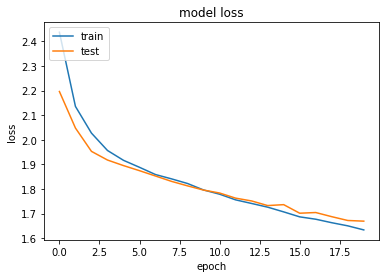

In [ ]:
print(history.history.keys())
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np

chatbot = load_model('chatbot.h5')

test_sentence = ['i do not feel well']

sequence = tokenizer.texts_to_sequences(test_sentence)

predictions = model.predict(sequence)
print(predictions)
print(np.argmax(predictions))
s = np.argmax(predictions)
idx2sentiment = {}

for i,s in enumerate(sentimentArr):
  idx2sentiment.update({i:s})

print(sentimentTokenizer.get_config())


[[4.4284061e-02 2.2680397e-01 9.6204552e-05 2.9264960e-02 9.0456724e-02
  2.1569803e-01 1.2188174e-01 3.4843415e-03 2.1615556e-06 4.0737040e-02
  2.0407822e-02 5.4572184e-02 1.5231074e-01]]
1
{'num_words': 13, 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', 'lower': True, 'split': ' ', 'char_level': False, 'oov_token': None, 'document_count': 67717, 'word_counts': '{"sadness": 5209, "anger": 5209, "love": 5209, "relief": 5209, "worry": 5209, "neutral": 5209, "enthusiasm": 5209, "boredom": 5209, "empty": 5209, "fun": 5209, "hate": 5209, "surprise": 5209, "happiness": 5209}', 'word_docs': '{"sadness": 5209, "anger": 5209, "love": 5209, "relief": 5209, "worry": 5209, "neutral": 5209, "enthusiasm": 5209, "boredom": 5209, "empty": 5209, "fun": 5209, "hate": 5209, "surprise": 5209, "happiness": 5209}', 'index_docs': '{"1": 5209, "2": 5209, "3": 5209, "4": 5209, "5": 5209, "6": 5209, "7": 5209, "8": 5209, "9": 5209, "10": 5209, "11": 5209, "12": 5209, "13": 5209}', 'index_word': '{"1": "sa

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = ['I love the cat a lot', 'I love the dog to my heart']

tokenizer = Tokenizer(num_words=100)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

test = ['I love you a lot', 'The dog is my heart', 'I do not hold cats to my heart, love']
sequence = tokenizer.texts_to_sequences(test)
print(sequence)

padded_sequence = pad_sequences(sequence)
print(padded_sequence)

{'i': 1, 'love': 2, 'the': 3, 'cat': 4, 'a': 5, 'lot': 6, 'dog': 7, 'to': 8, 'my': 9, 'heart': 10}
[[1, 2, 5, 6], [3, 7, 9, 10], [1, 8, 9, 10, 2]]
[[ 0  1  2  5  6]
 [ 0  3  7  9 10]
 [ 1  8  9 10  2]]


In [ ]:
print(dataset.element_spec)

(TensorSpec(shape=(64, None), dtype=tf.int64, name=None), TensorSpec(shape=(64,), dtype=tf.int32, name=None))


# Creating the Model

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfd
from keras.layers.recurrent import LSTM